<center> <font size =6> Using census data to predict income </font></center>

## Table of contents </br>

- [Prepare the data](#preparation)
- [Neural network model](#neural_network)
- [Random Forest Decision Tree Moel](#random_forest)
- [Neural network model with outlier removal algorithm](#NN_w_outliers_removed)
- [Analysis of the features used to build the model](#analysis)

<a id="preparation"></a>
### I. Prepare the data.

Load the data into Pandas dataframe.

In [1]:
import pandas as pd
df=pd.read_csv("adult.csv")
df

,age,work_class,fnlwgt,education_level,yrs_of_ed,marital_status,occupation,relation,race,gender,capital_gain,capital_loss,hours_per_week,native_country,census_incom
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


The dataset has missing values. First, we are going to check which column has missing values. For numeric values, we are going to compute their medians. Sometimes, missing numeric values are filled with a very large number such as 99999. In addition to the median, we are also going to output the maximum value of each column. Why are we not calculating the mean? If missing values are currently being represented by large numbers such as 99999, calcualting the mean can severely deteriorate the accuracy of our analysis. The mean is very sensitive to large numbers in the data, whereas the median is not. The median of this dataset will stay the same even if missing values are represented by large numbers such as 99999.

In [2]:
print(df[["age"]].median(),"\n",df[["age"]].max())


age    37.0
dtype: float64 
 age    90
dtype: int64


It looks like there is no missing value in the "age" column.

In [3]:
print(df[["fnlwgt"]].median())
print(df[["fnlwgt"]].max())

fnlwgt    178356.0
dtype: float64
fnlwgt    1484705
dtype: int64


In [4]:
print(df[["capital_gain"]].median())
print(df[["capital_gain"]].max())

capital_gain    0.0
dtype: float64
capital_gain    99999
dtype: int64


It looks like there is at least one missing value in the "capital_gain" column.

In [5]:
df_missing=df[df["capital_gain"]==99999]
df_missing

,age,work_class,fnlwgt,education_level,yrs_of_ed,marital_status,occupation,relation,race,gender,capital_gain,capital_loss,hours_per_week,native_country,census_incom
1246,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1368,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1482,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1528,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1616,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31828,47,Private,155664,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
31972,43,Self-emp-inc,62026,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
32090,66,Private,115498,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,?,>50K
32238,47,Private,294913,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


We are going to replace these missing values with the mean of the column.

In [6]:
capital_gain=df[["capital_gain"]].replace(99999,df[["capital_gain"]].median())
capital_gain.head()

,capital_gain
0,2174
1,0
2,0
3,0
4,0


In [7]:
df=df.drop(["capital_gain"],axis=1)
df=pd.concat([df,capital_gain],axis=1)
df.head()

,age,work_class,fnlwgt,education_level,yrs_of_ed,marital_status,occupation,relation,race,gender,capital_loss,hours_per_week,native_country,census_incom,capital_gain
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,<=50K,0


Double-check that the "99999" in the "capital_gain" column has been replaced with the median value of the column.

In [8]:
df[["capital_gain"]].max()

capital_gain    41310
dtype: int64

It has been replaced. Let's check the next numeric attribute.

In [9]:
df[["capital_loss"]].max()

capital_loss    4356
dtype: int64

In [10]:
df[["yrs_of_ed"]].max()

yrs_of_ed    16
dtype: int64

It seems that "capital_gain" was the only numeric attribute with missing values, which we replaced with the median of the column.

Let's now check the categorical variables. For the categorical variables, we are going to output the unique values of the column. If we see anything such as a question mark "?", or "None", or "N/A", those are the rows with missing values.

In [11]:
import numpy as np
np.unique(df[["work_class"]])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

We saw that there is a "?" in the values of the "work_class" column. That means there are missing values. This is a categorical variable. We could not replace with the mean or median, etc. Replacing with the mode is not meaningful either. So, we are replace the "?" with the word "unkown".

In [12]:
work_class=df[["work_class"]].replace(" ?","unknown")
df=df.drop(["work_class"],axis=1)
df=pd.concat([df,work_class],axis=1)
df.head()

,age,fnlwgt,education_level,yrs_of_ed,marital_status,occupation,relation,race,gender,capital_loss,hours_per_week,native_country,census_incom,capital_gain,work_class
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,40,United-States,<=50K,2174,State-gov
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,<=50K,0,Self-emp-not-inc
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,<=50K,0,Private
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,<=50K,0,Private
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,<=50K,0,Private


Double check that the question mark has been replaced with "unknown".

In [13]:
np.unique(df[["work_class"]])

array([' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay',
       'unknown'], dtype=object)

The question mark has been replaced with the word "unknown". There was something very subtle here that if not noticed, no matter what method is used, the question mark just could not be replaced. **There was a space in front of the question mark.** So, when using the "replace" function, the value to be replaced is " ?" (a space + the quesiton mark). Without that proceeding space, the question mark would stay there no matter what method is used. (How do I know? I tried.)

Let's check the other categorical variables as well.

In [14]:
np.unique(df[["education_level"]])

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

There is no missing value in the "education_level" column.

In [15]:
np.unique(df[["marital_status"]])

array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object)

There is no missing value in the "marital_status" column.

In [16]:
np.unique(df[["occupation"]])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

Therer are rows with missing values in the "occupation" column. We are going to replace that question mark with the word "unknown".

In [17]:
occupation=df[["occupation"]].replace(" ?","unknown")
df=df.drop(["occupation"],axis=1)
df=pd.concat([df,occupation],axis=1)
df.head()

,age,fnlwgt,education_level,yrs_of_ed,marital_status,relation,race,gender,capital_loss,hours_per_week,native_country,census_incom,capital_gain,work_class,occupation
0,39,77516,Bachelors,13,Never-married,Not-in-family,White,Male,0,40,United-States,<=50K,2174,State-gov,Adm-clerical
1,50,83311,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,13,United-States,<=50K,0,Self-emp-not-inc,Exec-managerial
2,38,215646,HS-grad,9,Divorced,Not-in-family,White,Male,0,40,United-States,<=50K,0,Private,Handlers-cleaners
3,53,234721,11th,7,Married-civ-spouse,Husband,Black,Male,0,40,United-States,<=50K,0,Private,Handlers-cleaners
4,28,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,40,Cuba,<=50K,0,Private,Prof-specialty


Double check that the question mark has been replaced.

In [18]:
np.unique(df[["occupation"]])

array([' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving', 'unknown'], dtype=object)

The question mark had been replaced.

In [19]:
np.unique(df[["relation"]])

array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
       ' Unmarried', ' Wife'], dtype=object)

There is no missing value in the "relation" column.

In [20]:
np.unique(df[["race"]])

array([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'], dtype=object)

There is no missing value in the "race" column.

In [21]:
np.unique(df[["gender"]])

array([' Female', ' Male'], dtype=object)

In [22]:
np.unique(df[["native_country"]])

array([' ?', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',
       ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',
       ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',
       ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
       ' United-States', ' Vietnam', ' Yugoslavia'], dtype=object)

There are missing values in the "native_country" column. We are going to replace that question mark with the word "unknown" again.

In [23]:
native_country=df[["native_country"]].replace(" ?","unknown")
df=df.drop(["native_country"],axis=1)
df=pd.concat([df,native_country],axis=1)
df.head()

,age,fnlwgt,education_level,yrs_of_ed,marital_status,relation,race,gender,capital_loss,hours_per_week,census_incom,capital_gain,work_class,occupation,native_country
0,39,77516,Bachelors,13,Never-married,Not-in-family,White,Male,0,40,<=50K,2174,State-gov,Adm-clerical,United-States
1,50,83311,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,13,<=50K,0,Self-emp-not-inc,Exec-managerial,United-States
2,38,215646,HS-grad,9,Divorced,Not-in-family,White,Male,0,40,<=50K,0,Private,Handlers-cleaners,United-States
3,53,234721,11th,7,Married-civ-spouse,Husband,Black,Male,0,40,<=50K,0,Private,Handlers-cleaners,United-States
4,28,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,40,<=50K,0,Private,Prof-specialty,Cuba


In [24]:
np.unique(df[["native_country"]])

array([' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',
       ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',
       ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',
       ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
       ' United-States', ' Vietnam', ' Yugoslavia', 'unknown'],
      dtype=object)

The quesiton mark had been replaced.

In [25]:
np.unique(df[["census_incom"]])

array([' <=50K', ' >50K'], dtype=object)

There is no missing value in the "census_incom" column.

The missing values had been taken care of. We are now going to separate numeric predictor, the categorical predictors and the target. For the categorical predictors, we are going to use label encoding instead of one-hot encoding. The categorical variables in this dataset are not ordinal. Normally, we would use one-hot encoding. However, some of the categorical variables in this dataset has many classes. If we are going to apply one-hot encoding to each categorical variable, the dataset will become so large that it will slow down any algorithm applied to it. So. we are going to apply the label encoding to the categorical variables. Then, we will concatenate them with the numeric variables and standardize them together. For the target variable, we will use one-hot encoding.

In [26]:
from sklearn import preprocessing
ed_level=df[["education_level"]]
le=preprocessing.LabelEncoder()
ed_level=le.fit_transform(ed_level)
ed_level=pd.DataFrame(ed_level).rename(columns={0:"education_level"})
ed_level.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,education_level
0,9
1,9
2,11
3,1
4,9


In [27]:
status=pd.DataFrame(le.fit_transform(df[["marital_status"]])).rename(columns={0:"marital_status"})
status.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,marital_status
0,4
1,2
2,0
3,2
4,2


In [28]:
relation= pd.DataFrame(le.fit_transform(df[["relation"]])).rename(columns={0:"relation"})
relation.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,relation
0,1
1,0
2,1
3,0
4,5


In [29]:
gender= pd.DataFrame(le.fit_transform(df[["gender"]])).rename(columns={0:"gender"})
gender.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,gender
0,1
1,1
2,1
3,1
4,0


In [30]:
work_class= pd.DataFrame(le.fit_transform(df[["work_class"]])).rename(columns={0:"work_class"})
work_class.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,work_class
0,6
1,5
2,3
3,3
4,3


In [31]:
occupation= pd.DataFrame(le.fit_transform(df[["occupation"]])).rename(columns={0:"occupation"})
occupation.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,occupation
0,0
1,3
2,5
3,5
4,9


In [32]:
native_country= pd.DataFrame(le.fit_transform(df[["native_country"]])).rename(columns={0:"native_country"})
native_country.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,native_country
0,38
1,38
2,38
3,38
4,4


In [33]:
race= pd.DataFrame(le.fit_transform(df[["race"]])).rename(columns={0:"race"})
race.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,race
0,4
1,4
2,4
3,2
4,2


In [34]:
numeric=df[["age","fnlwgt","yrs_of_ed","capital_loss","hours_per_week","capital_gain"]]
predictors=pd.concat([numeric,native_country,occupation,work_class,gender,race,relation,status,ed_level],axis=1)
predictors

,age,fnlwgt,yrs_of_ed,capital_loss,hours_per_week,capital_gain,native_country,occupation,work_class,gender,race,relation,marital_status,education_level
0,39,77516,13,0,40,2174,38,0,6,1,4,1,4,9
1,50,83311,13,0,13,0,38,3,5,1,4,0,2,9
2,38,215646,9,0,40,0,38,5,3,1,4,1,0,11
3,53,234721,7,0,40,0,38,5,3,1,2,0,2,1
4,28,338409,13,0,40,0,4,9,3,0,2,5,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,38,0,38,12,3,0,4,5,2,7
32557,40,154374,9,0,40,0,38,6,3,1,4,0,2,11
32558,58,151910,9,0,40,0,38,0,3,0,4,4,6,11
32559,22,201490,9,0,20,0,38,0,3,1,4,3,4,11


Standardize the predictors.

In [35]:
names=predictors.columns
scaler=preprocessing.StandardScaler()
predictors=scaler.fit_transform(predictors)
X=pd.DataFrame(predictors,columns=names)
X.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,fnlwgt,yrs_of_ed,capital_loss,hours_per_week,capital_gain,native_country,occupation,work_class,gender,race,relation,marital_status,education_level
0,0.030671,-1.063611,1.134739,-0.21666,-0.035429,0.620391,0.251378,-1.483582,1.658412,0.703071,0.393668,-0.277805,0.921634,-0.335437
1,0.837109,-1.008707,1.134739,-0.21666,-2.222153,-0.230725,0.251378,-0.790510,1.026306,0.703071,0.393668,-0.900181,-0.406212,-0.335437
2,-0.042642,0.245079,-0.420060,-0.21666,-0.035429,-0.230725,0.251378,-0.328461,-0.237906,0.703071,0.393668,-0.277805,-1.734058,0.181332
3,1.057047,0.425801,-1.197459,-0.21666,-0.035429,-0.230725,0.251378,-0.328461,-0.237906,0.703071,-1.962621,-0.900181,-0.406212,-2.402511
4,-0.775768,1.408176,1.134739,-0.21666,-0.035429,-0.230725,-5.337971,0.595635,-0.237906,-1.422331,-1.962621,2.211698,-0.406212,-0.335437


Let's compute the feature importance scores and see if there is any predictor variable that is not relevant.

In [36]:
y=df[["census_incom"]]
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=mutual_info_classif, k="all")
fit = test.fit(X, y)
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

# Sort the feature scores in ascending order.
scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores.sort_values(by=["scores"],ascending=False)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,scores
11,0.111054
12,0.109670
5,0.075953
0,0.068734
2,0.065326
7,0.063483
13,0.063179
4,0.040532
3,0.034172
1,0.032695


It looks like all 14 features have some type of impact on the target variable, with the most important one being 10 times as important the least important one. This is a larget dataset. If we are going to use all features. It will slow down the training and testing process. Let's use try half of them and see what we can get.

In [37]:
X=X.iloc[:,[11,12,5,0,7,13,2]]
X.head()

,relation,marital_status,capital_gain,age,occupation,education_level,yrs_of_ed
0,-0.277805,0.921634,0.620391,0.030671,-1.483582,-0.335437,1.134739
1,-0.900181,-0.406212,-0.230725,0.837109,-0.790510,-0.335437,1.134739
2,-0.277805,-1.734058,-0.230725,-0.042642,-0.328461,0.181332,-0.420060
3,-0.900181,-0.406212,-0.230725,1.057047,-0.328461,-2.402511,-1.197459
4,2.211698,-0.406212,-0.230725,-0.775768,0.595635,-0.335437,1.134739


One-hot encode the target variable.

In [38]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y=pd.DataFrame(enc.fit_transform(y).toarray())
y.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


The data is finally cleaned and properly processed. Separate the cleaned and processed data into train and test subsets.

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(26048, 7)
(6513, 7)


<a id="neural_network"></a>
### II. Neural network 

We are finally ready to build the neural network. 

In [67]:
length=X_train.shape[1]
num_classes=y_test.shape[1]

import keras
from keras.models import Sequential
from keras.layers import Dense

# define classification model

def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(length, activation='relu', input_shape=(length,)))
    model.add(Dense(60,activation='relu'))
    model.add(Dense(60,activation="relu"))
    model.add(Dense(60,activation="relu"))
    model.add(Dense(60,activation="relu"))
    model.add(Dense(60,activation="tanh"))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [68]:
model=classification_model()
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20, verbose=2)
model.evaluate(X_test,y_test,verbose=0)

Train on 26048 samples, validate on 6513 samples
Epoch 1/20
 - 19s - loss: 0.3831 - acc: 0.8243 - val_loss: 0.3512 - val_acc: 0.8376
Epoch 2/20
 - 17s - loss: 0.3480 - acc: 0.8380 - val_loss: 0.3508 - val_acc: 0.8382
Epoch 3/20
 - 16s - loss: 0.3420 - acc: 0.8393 - val_loss: 0.3453 - val_acc: 0.8385
Epoch 4/20
 - 17s - loss: 0.3401 - acc: 0.8411 - val_loss: 0.3398 - val_acc: 0.8425
Epoch 5/20
 - 16s - loss: 0.3381 - acc: 0.8418 - val_loss: 0.3349 - val_acc: 0.8443
Epoch 6/20
 - 16s - loss: 0.3370 - acc: 0.8426 - val_loss: 0.3350 - val_acc: 0.8417
Epoch 7/20
 - 16s - loss: 0.3357 - acc: 0.8441 - val_loss: 0.3342 - val_acc: 0.8439
Epoch 8/20
 - 16s - loss: 0.3359 - acc: 0.8414 - val_loss: 0.3360 - val_acc: 0.8445
Epoch 9/20
 - 16s - loss: 0.3342 - acc: 0.8440 - val_loss: 0.3346 - val_acc: 0.8425
Epoch 10/20
 - 16s - loss: 0.3344 - acc: 0.8442 - val_loss: 0.3336 - val_acc: 0.8439
Epoch 11/20
 - 16s - loss: 0.3335 - acc: 0.8443 - val_loss: 0.3348 - val_acc: 0.8429
Epoch 12/20
 - 16s - loss

[0.33148804806892396, 0.8460003070964547]

The algorithm was run using different train-test splits. I have also experimented increasing or decreasing the number of neurons. I had also run the algorithm on the entire dataset, using all 14 predictor variables. 84.6% accuracy on test data is the best so far.

In [69]:
from sklearn.metrics import roc_auc_score
y_pred=model.predict(X_test)
roc_auc_score(y_test,y_pred)

0.896829994325004

AUC is 0.897. Not bad.

Let's try random forest as well.

<a id="random_forest"></a>
### III. Random Forest Decision Tree

In [70]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(criterion="entropy", max_depth = 8,min_samples_split=10)
RandomForest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
RandomForest.fit(X_train,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
y_pred = RandomForest.predict(X_test)

In [73]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.8436972209427299


Random Forest Decision Tree gave us a similar accuracy on test data as the neural network model.

In [74]:
print("AUC of the random forest desicion tree model is: ",roc_auc_score(y_test,y_pred))

AUC of the random forest desicion tree model is:  0.7235463521985522


However, the AUC of the random forest decision tree model is much lower.

We will go with the neural network model.

<a id ="NN_w_outliers_removed"></a>
### IV. Neural network with outlier removal algorithm

Let's implement on outlier remove algorithm on the neural network model and see if what will improve the accuracy and/or AUC on test data. **Re-start the kernel and re-run the code blocks up to the one that forms the predictor set X with 7 features.**

In [42]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(X)
outlier_label=pd.DataFrame(clf.predict(X))
outlier_label=outlier_label.rename(columns={0:"outlier_label"})
outlier_label

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


,outlier_label
0,1
1,1
2,1
3,1
4,1
...,...
32556,1
32557,1
32558,-1
32559,1


In [43]:
X= pd.concat([X,outlier_label], axis=1, sort=False)
X=X.loc[X["outlier_label"] == 1]
X=X.drop(["outlier_label"],axis=1)
X

,relation,marital_status,capital_gain,age,occupation,education_level,yrs_of_ed
0,-0.277805,0.921634,0.620391,0.030671,-1.483582,-0.335437,1.134739
1,-0.900181,-0.406212,-0.230725,0.837109,-0.790510,-0.335437,1.134739
2,-0.277805,-1.734058,-0.230725,-0.042642,-0.328461,0.181332,-0.420060
3,-0.900181,-0.406212,-0.230725,1.057047,-0.328461,-2.402511,-1.197459
4,2.211698,-0.406212,-0.230725,-0.775768,0.595635,-0.335437,1.134739
...,...,...,...,...,...,...,...
32554,-0.900181,-0.406212,-0.230725,1.057047,-0.790510,0.439716,1.523438
32555,-0.277805,0.921634,-0.230725,-1.215643,0.826659,1.214869,-0.031360
32556,2.211698,-0.406212,-0.230725,-0.849080,1.288707,-0.852205,0.746039
32557,-0.900181,-0.406212,-0.230725,0.103983,-0.097437,0.181332,-0.420060


The outlier removal algorithm removed 3,210 rows. We need to remove the corresponding rows in the target variable as well.

In [44]:
y= pd.concat([y,outlier_label], axis=1, sort=False)
y=y.loc[y["outlier_label"] == 1]
y=y.drop(["outlier_label"],axis=1)
y

,census_incom
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32554,>50K
32555,<=50K
32556,<=50K
32557,>50K


One-hot encode y again.

In [45]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y=pd.DataFrame(enc.fit_transform(y).toarray())
y.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape)
print(X_test.shape)

(17583, 7)
(11722, 7)


In [47]:
length=X_train.shape[1]
num_classes=y_test.shape[1]

import keras
from keras.models import Sequential
from keras.layers import Dense

# define classification model

def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(length, activation='relu', input_shape=(length,)))
    model.add(Dense(60,activation='relu'))
    model.add(Dense(60,activation="relu"))
    model.add(Dense(60,activation="relu"))
    model.add(Dense(60,activation="relu"))
    model.add(Dense(60,activation="tanh"))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

In [48]:
model=classification_model()
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20, verbose=2)
model.evaluate(X_test,y_test,verbose=0)

Train on 17583 samples, validate on 11722 samples
Epoch 1/20
 - 13s - loss: 0.4146 - acc: 0.8096 - val_loss: 0.3806 - val_acc: 0.8237
Epoch 2/20
 - 13s - loss: 0.3780 - acc: 0.8210 - val_loss: 0.3650 - val_acc: 0.8261
Epoch 3/20
 - 12s - loss: 0.3721 - acc: 0.8248 - val_loss: 0.3598 - val_acc: 0.8255
Epoch 4/20
 - 12s - loss: 0.3676 - acc: 0.8278 - val_loss: 0.3612 - val_acc: 0.8288
Epoch 5/20
 - 12s - loss: 0.3668 - acc: 0.8287 - val_loss: 0.3629 - val_acc: 0.8290
Epoch 6/20
 - 12s - loss: 0.3658 - acc: 0.8303 - val_loss: 0.3573 - val_acc: 0.8317
Epoch 7/20
 - 13s - loss: 0.3641 - acc: 0.8306 - val_loss: 0.3644 - val_acc: 0.8305
Epoch 8/20
 - 11s - loss: 0.3629 - acc: 0.8315 - val_loss: 0.3581 - val_acc: 0.8267
Epoch 9/20
 - 12s - loss: 0.3623 - acc: 0.8294 - val_loss: 0.3554 - val_acc: 0.8319
Epoch 10/20
 - 12s - loss: 0.3620 - acc: 0.8306 - val_loss: 0.3551 - val_acc: 0.8287
Epoch 11/20
 - 12s - loss: 0.3615 - acc: 0.8303 - val_loss: 0.3577 - val_acc: 0.8292
Epoch 12/20
 - 12s - los

[0.35344656788332635, 0.831513393598497]

83.5% on test data versus the 84.6% without an outlier removal algorithm. We will go with the neural network model without an outlier removal algorithm.

<a id="analysis"></a>
### V. Analysis of the features used to build the neural network model.

Let's analyze the 7 most important features selected by the algorithm, also the 7 features used to build the models above.

In [75]:
X.columns

Index(['relation', 'marital_status', 'capital_gain', 'age', 'occupation',
       'education_level', 'yrs_of_ed'],
      dtype='object')

Although "gender", "race", "country_origin" and "hours_per_week" impact an individual's income level, these features are not as important as the features shown above. The most impatcful factors on a person's income are "relation", "marital_status","capital_gain","age","occupation","education_level","yrs_of_ed" (years of education).

Education and occupation play a very important role in an individual's income. It is interesting that the algorithm selected "relation" as the most important feature, followed by "marital_status". 

Let's see compare the 7 features used to build the model for adults with income aboe 50K and adults with income below or at 50K. For the numeric variables, we are going to compute the mean. For the categorical variables, we are not just going to look at the head counts. That can be misleading. Instead, we are going to look at the proportion of each class.

In [38]:
df_sub=df[['relation', 'marital_status', 'capital_gain', 'age', 'occupation','education_level', 'yrs_of_ed','census_incom']]
df_sub.head()

,relation,marital_status,capital_gain,age,occupation,education_level,yrs_of_ed,census_incom
0,Not-in-family,Never-married,2174,39,Adm-clerical,Bachelors,13,<=50K
1,Husband,Married-civ-spouse,0,50,Exec-managerial,Bachelors,13,<=50K
2,Not-in-family,Divorced,0,38,Handlers-cleaners,HS-grad,9,<=50K
3,Husband,Married-civ-spouse,0,53,Handlers-cleaners,11th,7,<=50K
4,Wife,Married-civ-spouse,0,28,Prof-specialty,Bachelors,13,<=50K


In [39]:
df_yes=df_sub[df_sub["census_incom"]==" >50K"]
df_yes

,relation,marital_status,capital_gain,age,occupation,education_level,yrs_of_ed,census_incom
7,Husband,Married-civ-spouse,0,52,Exec-managerial,HS-grad,9,>50K
8,Not-in-family,Never-married,14084,31,Prof-specialty,Masters,14,>50K
9,Husband,Married-civ-spouse,5178,42,Exec-managerial,Bachelors,13,>50K
10,Husband,Married-civ-spouse,0,37,Exec-managerial,Some-college,10,>50K
11,Husband,Married-civ-spouse,0,30,Prof-specialty,Bachelors,13,>50K
...,...,...,...,...,...,...,...,...
32539,Husband,Married-civ-spouse,0,71,unknown,Doctorate,16,>50K
32545,Wife,Married-civ-spouse,0,39,Adm-clerical,Assoc-acdm,12,>50K
32554,Husband,Married-civ-spouse,0,53,Exec-managerial,Masters,14,>50K
32557,Husband,Married-civ-spouse,0,40,Machine-op-inspct,HS-grad,9,>50K


In [40]:
np.unique(df[["relation"]])

array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
       ' Unmarried', ' Wife'], dtype=object)

In [41]:
relation_0=df_yes[df_yes["relation"]==" Husband"]
print("Husband: ", len(relation_0)/len(df_yes))

relation_1=df_yes[df_yes["relation"]==" Not-in-family"]
print("Not-in-family: ", len(relation_1)/len(df_yes))

relation_2=df_yes[df_yes["relation"]==" Other-relative"]
print("Other-relative: ", len(relation_2)/len(df_yes))

relation_3=df_yes[df_yes["relation"] == " Own-child"]
print("Own-child: ", len(relation_3)/len(df_yes))

relation_4=df_yes[df_yes["relation"]==" Unmarried"]
print("Unmarried: ", len(relation_4)/len(df_yes))

relation_5=df_yes[df_yes["relation"]==" Wife"]
print("Wife: ", len(relation_5)/len(df_yes))

Husband:  0.7547506695574544
Not-in-family:  0.10916974875653615
Other-relative:  0.004718785869149343
Own-child:  0.008544828465756918
Unmarried:  0.02780257620201505
Wife:  0.09501339114908813


In [42]:
np.unique(df_yes[["marital_status"]])

array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object)

In [43]:
status_0=df_yes[df_yes["marital_status"]==" Divorced"]
print("Divorced: ", len(status_0)/len(df_yes))

status_1=df_yes[df_yes["marital_status"]==" Married-AF-spouse"]
print("Married-AF-spouse: ", len(status_1)/len(df_yes))

status_2=df_yes[df_yes["marital_status"]==" Married-civ-spouse"]
print("Married-civ-spouse: ", len(status_2)/len(df_yes))

status_3=df_yes[df_yes["marital_status"]==" Married-spouse-absent"]
print("Married-spouse-absent: ", len(status_3)/len(df_yes))

status_4=df_yes[df_yes["marital_status"]==" Never-married"]
print("Never married: ", len(status_4)/len(df_yes))

status_5=df_yes[df_yes["marital_status"]==" Separatedd"]
print("Separated: ", len(status_5)/len(df_yes))

status_6=df_yes[df_yes["marital_status"]==" Widowed"]
print("Widowed: ", len(status_5)/len(df_yes))                

Divorced:  0.05904859074097692
Married-AF-spouse:  0.0012753475322025251
Married-civ-spouse:  0.8534625685499299
Married-spouse-absent:  0.004336181609488586
Never married:  0.06261956383114399
Separated:  0.0
Widowed:  0.0


The above are the proportions for the two of the categorical variables "relation" and "marital_status" for individuals with income above 50K. **This is taking too long.** We will need to compute the proportion of EACH categorical variable that way for the individuals with income above 50K. Then, start the process all over again for the individuals with income at or below 50K. 

To speed up the process, I am going to output the subset of the data that was used to build the model to .csv file and use Excel's Pivot Table.

In [46]:
df_sub.to_csv("adult_subset.csv")

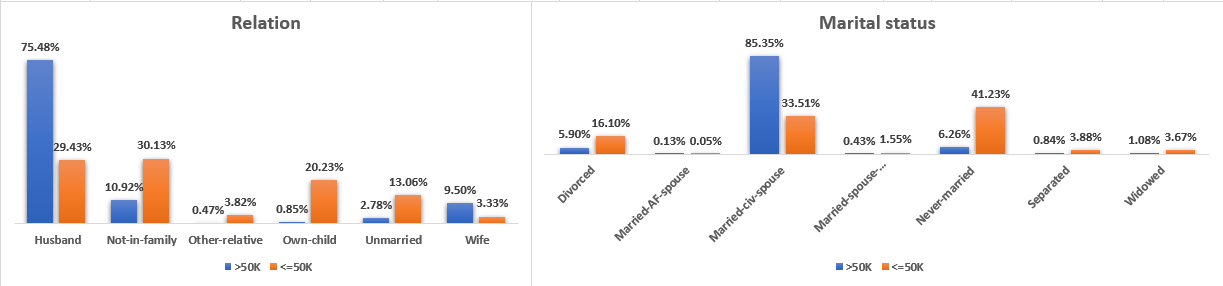

In [51]:
from IPython.display import Image
Image(filename='chart_1.png')

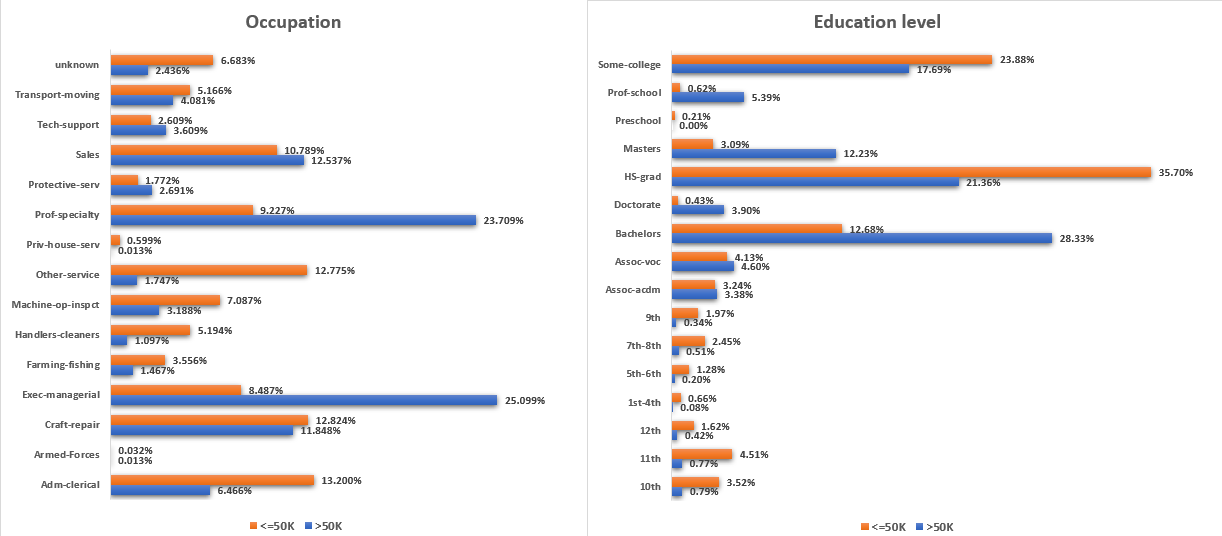

In [52]:
Image(filename="chart_2.png")

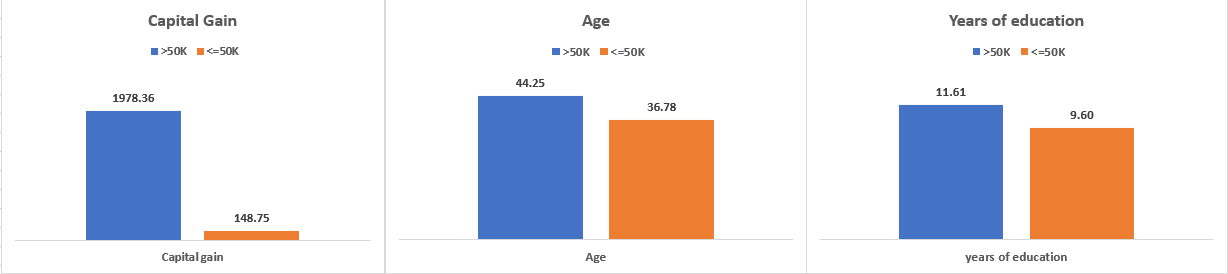

In [53]:
Image(filename="chart_3.png")

What differences do we see between the adults with income greater than 50K and adults with income at most 50K? Here are some of the differences: <br>
- Adults with income above 50K had more years of education.
- Adults with income above 50K were much more likely to have a Bachelor's degree, Master's or PhD.
- Adults with income above 50K were on average older. 
- Adults with income above 50K invested. Their capital gain was more than 10 times of that of adults with at most 50K income.
- They were married. I wonder if that was because family life made people more responsible and more mature.
- They held jobs in the quaternary sector or Quinary sector, i.e., tech-spport, IT, professional-specialty, executive-managerial. Especially for "professional-specialty" and "executive-managerial", compared with adults with income at most 50K, considerablly more adults with income above 50K held jobs in these two areas.

**That's it for the census dataset. A very messy dataset but contains a lot of useful and even educational information. It is a reflection of people's lives and stories.**